## Final Project Submission
* Name: Kezia Setokusumo
* Pace: Self-Paced
* Scheduled Project Review:
* Instructor: Mark Barbour
* Blog Post

## Overview and Problem Statement
This project focuses on building a Natural Language Processing (NLP) tool to analyze sentiment about products released by Apple and Google.

## The Data

## Data Exploration, Cleaning, and Preprocessing

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
data = pd.read_csv('tweet_data.csv', encoding="ISO-8859-1")

In [2]:
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
data.columns = ['tweet', 'product', 'sentiment']

In [4]:
data[data.duplicated()]

,tweet,product,sentiment
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
776,Google to Launch Major New Social Network Call...,NaN,No emotion toward brand or product
2232,Marissa Mayer: Google Will Connect the Digital...,NaN,No emotion toward brand or product
2559,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
3950,Really enjoying the changes in Gowalla 3.0 for...,Android App,Positive emotion
3962,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
4897,"Oh. My. God. The #SXSW app for iPad is pure, u...",iPad or iPhone App,Positive emotion
5338,RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ...,NaN,No emotion toward brand or product
5341,"RT @mention ÷¼ Happy Woman's Day! Make love, ...",NaN,No emotion toward brand or product
5881,RT @mention Google to Launch Major New Social ...,NaN,No emotion toward brand or product


In [5]:
data.drop_duplicates(keep='first', inplace=True)
data.duplicated().sum()

0

In [6]:
data['tweet'] = data['tweet'].replace(r'http\S+', '', regex=True)
data['tweet'] = data['tweet'].str.lower()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9071 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9070 non-null   object
 1   product    3282 non-null   object
 2   sentiment  9071 non-null   object
dtypes: object(3)
memory usage: 283.5+ KB


In [8]:
data.isna().sum()

tweet           1
product      5789
sentiment       0
dtype: int64

In [9]:
data = data[data['tweet'].isna() == False]

In [10]:
data['product'].fillna('unknown', inplace=True)
data['product'].value_counts()

unknown                            5788
iPad                                945
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: product, dtype: int64

In [11]:
data.isna().sum()

tweet        0
product      0
sentiment    0
dtype: int64

In [12]:
data['sentiment'].value_counts()

No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: sentiment, dtype: int64

In [13]:
data = data[data['sentiment']!="I can't tell"]
data['sentiment'].value_counts()

No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
Name: sentiment, dtype: int64

In [14]:
rename_sentiment = {"Positive emotion": "positive", "Negative emotion": "negative", "No emotion toward brand or product": "none"}
data['sentiment'] = data['sentiment'].map(rename_sentiment)
data['sentiment'].value_counts()

none        5375
positive    2970
negative     569
Name: sentiment, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8914 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      8914 non-null   object
 1   product    8914 non-null   object
 2   sentiment  8914 non-null   object
dtypes: object(3)
memory usage: 278.6+ KB


In [16]:
from nltk import TweetTokenizer
import string
tk = TweetTokenizer(strip_handles=True)
data['tweet_tokenized']=data['tweet'].apply(tk.tokenize)
data

,tweet,product,sentiment,tweet_tokenized
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,negative,"[., i, have, a, 3g, iphone, ., after, 3, hrs, ..."
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,positive,"[know, about, ?, awesome, ipad, /, iphone, app..."
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,positive,"[can, not, wait, for, #ipad, 2, also, ., they,..."
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,negative,"[i, hope, this, year's, festival, isn't, as, c..."
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,positive,"[great, stuff, on, fri, #sxsw, :, marissa, may..."
...,...,...,...,...
9088,ipad everywhere. #sxsw {link},iPad,positive,"[ipad, everywhere, ., #sxsw, {, link, }]"
9089,"wave, buzz... rt @mention we interrupt your re...",unknown,none,"[wave, ,, buzz, ..., rt, we, interrupt, your, ..."
9090,"google's zeiger, a physician never reported po...",unknown,none,"[google's, zeiger, ,, a, physician, never, rep..."
9091,some verizon iphone customers complained their...,unknown,none,"[some, verizon, iphone, customers, complained,..."


In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/keziasetokusumo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
def remove_stopwords(tokens):
    kept = []
    for word in tokens:
        if word not in stopwords_list:
            kept.append(word)
    return kept
data["tweet_without_stopwords"] = data["tweet_tokenized"].apply(remove_stopwords)
data

,tweet,product,sentiment,tweet_tokenized,tweet_without_stopwords
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,negative,"[., i, have, a, 3g, iphone, ., after, 3, hrs, ...","[., 3g, iphone, ., 3, hrs, tweeting, #rise_aus..."
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,positive,"[know, about, ?, awesome, ipad, /, iphone, app...","[know, ?, awesome, ipad, /, iphone, app, likel..."
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,positive,"[can, not, wait, for, #ipad, 2, also, ., they,...","[wait, #ipad, 2, also, ., sale, #sxsw, .]"
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,negative,"[i, hope, this, year's, festival, isn't, as, c...","[hope, year's, festival, crashy, year's, iphon..."
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,positive,"[great, stuff, on, fri, #sxsw, :, marissa, may...","[great, stuff, fri, #sxsw, :, marissa, mayer, ..."
...,...,...,...,...,...
9088,ipad everywhere. #sxsw {link},iPad,positive,"[ipad, everywhere, ., #sxsw, {, link, }]","[ipad, everywhere, ., #sxsw, {, link, }]"
9089,"wave, buzz... rt @mention we interrupt your re...",unknown,none,"[wave, ,, buzz, ..., rt, we, interrupt, your, ...","[wave, ,, buzz, ..., rt, interrupt, regularly,..."
9090,"google's zeiger, a physician never reported po...",unknown,none,"[google's, zeiger, ,, a, physician, never, rep...","[google's, zeiger, ,, physician, never, report..."
9091,some verizon iphone customers complained their...,unknown,none,"[some, verizon, iphone, customers, complained,...","[verizon, iphone, customers, complained, time,..."


In [19]:
def punc_stripped(twt_tokenized):
    stripped = []
    for item in twt_tokenized:
        if item not in string.punctuation:
            stripped.append(item)
    stripped_2 = []
    for ele in stripped:
        char_stripped = ''
        for char in ele:
            if char not in string.punctuation:
                char_stripped+=char
        stripped_2.append(char_stripped)
    return stripped_2
data['tweet_without_stopwords_and_punc'] = data['tweet_without_stopwords'].apply(punc_stripped)
data

,tweet,product,sentiment,tweet_tokenized,tweet_without_stopwords,tweet_without_stopwords_and_punc
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,negative,"[., i, have, a, 3g, iphone, ., after, 3, hrs, ...","[., 3g, iphone, ., 3, hrs, tweeting, #rise_aus...","[3g, iphone, 3, hrs, tweeting, riseaustin, dea..."
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,positive,"[know, about, ?, awesome, ipad, /, iphone, app...","[know, ?, awesome, ipad, /, iphone, app, likel...","[know, awesome, ipad, iphone, app, likely, app..."
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,positive,"[can, not, wait, for, #ipad, 2, also, ., they,...","[wait, #ipad, 2, also, ., sale, #sxsw, .]","[wait, ipad, 2, also, sale, sxsw]"
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,negative,"[i, hope, this, year's, festival, isn't, as, c...","[hope, year's, festival, crashy, year's, iphon...","[hope, years, festival, crashy, years, iphone,..."
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,positive,"[great, stuff, on, fri, #sxsw, :, marissa, may...","[great, stuff, fri, #sxsw, :, marissa, mayer, ...","[great, stuff, fri, sxsw, marissa, mayer, goog..."
...,...,...,...,...,...,...
9088,ipad everywhere. #sxsw {link},iPad,positive,"[ipad, everywhere, ., #sxsw, {, link, }]","[ipad, everywhere, ., #sxsw, {, link, }]","[ipad, everywhere, sxsw, link]"
9089,"wave, buzz... rt @mention we interrupt your re...",unknown,none,"[wave, ,, buzz, ..., rt, we, interrupt, your, ...","[wave, ,, buzz, ..., rt, interrupt, regularly,...","[wave, buzz, , rt, interrupt, regularly, sched..."
9090,"google's zeiger, a physician never reported po...",unknown,none,"[google's, zeiger, ,, a, physician, never, rep...","[google's, zeiger, ,, physician, never, report...","[googles, zeiger, physician, never, reported, ..."
9091,some verizon iphone customers complained their...,unknown,none,"[some, verizon, iphone, customers, complained,...","[verizon, iphone, customers, complained, time,...","[verizon, iphone, customers, complained, time,..."


In [20]:
data_tokenized1 = data[['tweet', 'product', 'sentiment', 'tweet_without_stopwords_and_punc']]
data_tokenized1

,tweet,product,sentiment,tweet_without_stopwords_and_punc
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,negative,"[3g, iphone, 3, hrs, tweeting, riseaustin, dea..."
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,positive,"[know, awesome, ipad, iphone, app, likely, app..."
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,positive,"[wait, ipad, 2, also, sale, sxsw]"
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,negative,"[hope, years, festival, crashy, years, iphone,..."
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,positive,"[great, stuff, fri, sxsw, marissa, mayer, goog..."
...,...,...,...,...
9088,ipad everywhere. #sxsw {link},iPad,positive,"[ipad, everywhere, sxsw, link]"
9089,"wave, buzz... rt @mention we interrupt your re...",unknown,none,"[wave, buzz, , rt, interrupt, regularly, sched..."
9090,"google's zeiger, a physician never reported po...",unknown,none,"[googles, zeiger, physician, never, reported, ..."
9091,some verizon iphone customers complained their...,unknown,none,"[verizon, iphone, customers, complained, time,..."


In [21]:
positive_tweets_tk = data_tokenized1.loc[data_tokenized1['sentiment']=='positive']
positive_tweets_tk = positive_tweets_tk['tweet_without_stopwords_and_punc']
positive_tweets_tk

1       [know, awesome, ipad, iphone, app, likely, app...
2                       [wait, ipad, 2, also, sale, sxsw]
4       [great, stuff, fri, sxsw, marissa, mayer, goog...
7       [sxsw, starting, ctia, around, corner, googlei...
8       [beautifully, smart, simple, idea, rt, wrote, ...
                              ...                        
9072    [iphone, 4, cases, rad, ready, stop, tomorrow,...
9077    [pr, guy, convinced, switch, back, iphone, gre...
9079    [papyrus, , sort, like, ipad, nice, lol, sxsw,...
9085    [ive, always, used, camera, iphone, b, c, imag...
9088                       [ipad, everywhere, sxsw, link]
Name: tweet_without_stopwords_and_punc, Length: 2970, dtype: object

In [22]:
positive_tweets_tk_list = []
for twt in positive_tweets_tk:
    positive_tweets_tk_list += twt
positive_tweets_tk_list[:10]

['know',
 'awesome',
 'ipad',
 'iphone',
 'app',
 'likely',
 'appreciate',
 'design',
 'also',
 'theyre']

In [23]:
from nltk import FreqDist
fdist_pos = FreqDist(positive_tweets_tk_list)
fdist_pos.most_common(100)

[('sxsw', 3129),
 ('link', 1214),
 ('ipad', 1103),
 ('rt', 935),
 ('apple', 884),
 ('google', 672),
 ('2', 573),
 ('iphone', 549),
 ('store', 543),
 ('', 409),
 ('app', 398),
 ('new', 360),
 ('austin', 290),
 ('popup', 227),
 ('android', 202),
 ('\x89', 188),
 ('launch', 160),
 ('get', 158),
 ('great', 136),
 ('party', 134),
 ('via', 132),
 ('line', 131),
 ('ipad2', 131),
 ('time', 127),
 ('free', 125),
 ('social', 124),
 ('circles', 122),
 ('cool', 120),
 ('im', 117),
 ('like', 114),
 ('one', 111),
 ('today', 111),
 ('day', 109),
 ('maps', 107),
 ('w', 104),
 ('mobile', 100),
 ('sxswi', 97),
 ('awesome', 94),
 ('good', 92),
 ('love', 92),
 ('go', 92),
 ('temporary', 89),
 ('downtown', 88),
 ('opening', 88),
 ('network', 88),
 ('apps', 83),
 ('people', 82),
 ('got', 81),
 ('check', 77),
 ('û', 74),
 ('thanks', 73),
 ('see', 73),
 ('even', 70),
 ('going', 67),
 ('open', 67),
 ('mayer', 64),
 ('first', 64),
 ('called', 64),
 ('best', 62),
 ('around', 61),
 ('next', 61),
 ('ûï', 60),
 ('m

In [24]:
sxsw_words = []
for twt_tkn in data_tokenized1['tweet_without_stopwords_and_punc']:
    sxsw_words += twt_tkn
sxsw_words = [x for x in sxsw_words if 'sxsw' in x]
stopwords_list += sxsw_words
stopwords_list += ['rt', 'link','\x9d', 'û', '÷','\x89', 'ûï', '''''']

In [25]:
positive_tweets_tk_list = remove_stopwords(positive_tweets_tk_list)
fdist_pos = FreqDist(positive_tweets_tk_list)
fdist_pos.most_common(100)

[('ipad', 1103),
 ('apple', 884),
 ('google', 672),
 ('2', 573),
 ('iphone', 549),
 ('store', 543),
 ('app', 398),
 ('new', 360),
 ('austin', 290),
 ('popup', 227),
 ('android', 202),
 ('launch', 160),
 ('get', 158),
 ('great', 136),
 ('party', 134),
 ('via', 132),
 ('line', 131),
 ('ipad2', 131),
 ('time', 127),
 ('free', 125),
 ('social', 124),
 ('circles', 122),
 ('cool', 120),
 ('im', 117),
 ('like', 114),
 ('one', 111),
 ('today', 111),
 ('day', 109),
 ('maps', 107),
 ('w', 104),
 ('mobile', 100),
 ('awesome', 94),
 ('good', 92),
 ('love', 92),
 ('go', 92),
 ('temporary', 89),
 ('downtown', 88),
 ('opening', 88),
 ('network', 88),
 ('apps', 83),
 ('people', 82),
 ('got', 81),
 ('check', 77),
 ('thanks', 73),
 ('see', 73),
 ('even', 70),
 ('going', 67),
 ('open', 67),
 ('mayer', 64),
 ('first', 64),
 ('called', 64),
 ('best', 62),
 ('around', 61),
 ('next', 61),
 ('marissa', 59),
 ('major', 59),
 ('pop', 59),
 ('need', 58),
 ('wins', 58),
 ('want', 58),
 ('video', 57),
 ('win', 56)

In [26]:
neg_tweets_tk = data_tokenized1.loc[data_tokenized1['sentiment']=='negative']
neg_tweets_tk = neg_tweets_tk['tweet_without_stopwords_and_punc']
neg_tweets_tk_list = []
for twt in neg_tweets_tk:
    neg_tweets_tk_list += twt
neg_tweets_tk_list = remove_stopwords(neg_tweets_tk_list)
fdist_neg = FreqDist(neg_tweets_tk_list)
fdist_neg.most_common(100)

[('ipad', 198),
 ('iphone', 157),
 ('google', 149),
 ('apple', 115),
 ('2', 77),
 ('app', 60),
 ('store', 46),
 ('new', 43),
 ('like', 39),
 ('circles', 34),
 ('social', 31),
 ('apps', 30),
 ('design', 29),
 ('people', 29),
 ('need', 25),
 ('austin', 24),
 ('get', 24),
 ('android', 23),
 ('launch', 22),
 ('one', 22),
 ('today', 21),
 ('would', 19),
 ('news', 18),
 ('time', 18),
 ('think', 18),
 ('headaches', 17),
 ('go', 17),
 ('long', 17),
 ('fail', 17),
 ('line', 16),
 ('says', 16),
 ('ive', 16),
 ('im', 16),
 ('day', 16),
 ('network', 16),
 ('battery', 15),
 ('cant', 15),
 ('popup', 15),
 ('good', 15),
 ('see', 15),
 ('much', 15),
 ('america', 15),
 ('users', 14),
 ('money', 14),
 ('major', 14),
 ('really', 14),
 ('via', 14),
 ('fascist', 14),
 ('company', 14),
 ('going', 13),
 ('back', 13),
 ('called', 13),
 ('phone', 13),
 ('way', 13),
 ('many', 12),
 ('already', 12),
 ('1', 12),
 ('wait', 12),
 ('fast', 12),
 ('thing', 12),
 ('w', 12),
 ('tapworthy', 12),
 ('talk', 12),
 ('take',

In [27]:
none_tweets_tk = data_tokenized1.loc[data_tokenized1['sentiment']=='none']
none_tweets_tk = none_tweets_tk['tweet_without_stopwords_and_punc']
none_tweets_tk_list = []
for twt in none_tweets_tk:
    none_tweets_tk_list += twt
none_tweets_tk_list = remove_stopwords(none_tweets_tk_list)
fdist_none = FreqDist(none_tweets_tk_list)
fdist_none.most_common(100)

[('google', 1577),
 ('ipad', 1327),
 ('apple', 1187),
 ('store', 868),
 ('iphone', 836),
 ('new', 671),
 ('2', 655),
 ('austin', 625),
 ('circles', 493),
 ('social', 475),
 ('launch', 458),
 ('today', 428),
 ('popup', 378),
 ('android', 358),
 ('app', 355),
 ('network', 348),
 ('via', 282),
 ('called', 270),
 ('free', 260),
 ('line', 248),
 ('mobile', 228),
 ('major', 223),
 ('party', 210),
 ('get', 209),
 ('possibly', 184),
 ('temporary', 168),
 ('opening', 165),
 ('ipad2', 162),
 ('w', 144),
 ('one', 138),
 ('downtown', 136),
 ('check', 135),
 ('open', 135),
 ('going', 133),
 ('see', 132),
 ('like', 127),
 ('know', 126),
 ('googles', 124),
 ('time', 124),
 ('mayer', 124),
 ('im', 123),
 ('marissa', 122),
 ('need', 117),
 ('people', 112),
 ('apps', 111),
 ('music', 111),
 ('win', 111),
 ('come', 111),
 ('day', 104),
 ('us', 103),
 ('maps', 103),
 ('pop', 99),
 ('make', 95),
 ('launching', 95),
 ('panel', 94),
 ('news', 93),
 ('go', 93),
 ('anyone', 92),
 ('first', 91),
 ('tech', 91),


In [28]:
fdist_pos20 = list(zip(*fdist_pos.most_common(20)))
fdist_neg20 = list(zip(*fdist_neg.most_common(20)))
fdist_none20 = list(zip(*fdist_none.most_common(20)))

In [29]:
import matplotlib.pyplot as plt
def plot_fdist(fdist, title=None, color='blue'):
    y_axis = fdist[1]
    x_axis = fdist[0]
    fig, ax = plt.subplots(figsize=(20,5))
    ax.bar(x_axis, y_axis, color=color)
    ax.set_title(title)
    ax.set_ylabel('Count')
    ax.set_xlabel('Tokenized Words')

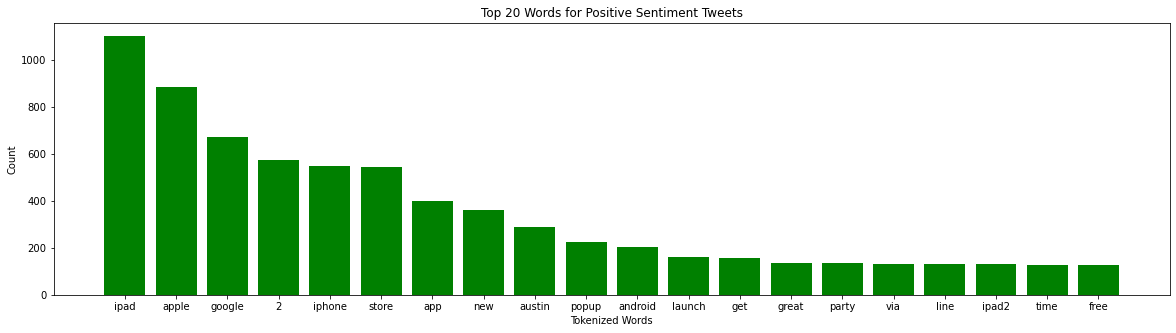

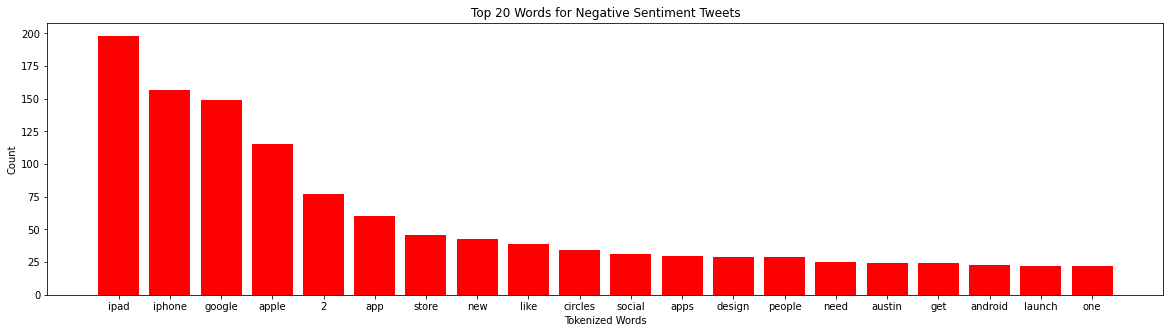

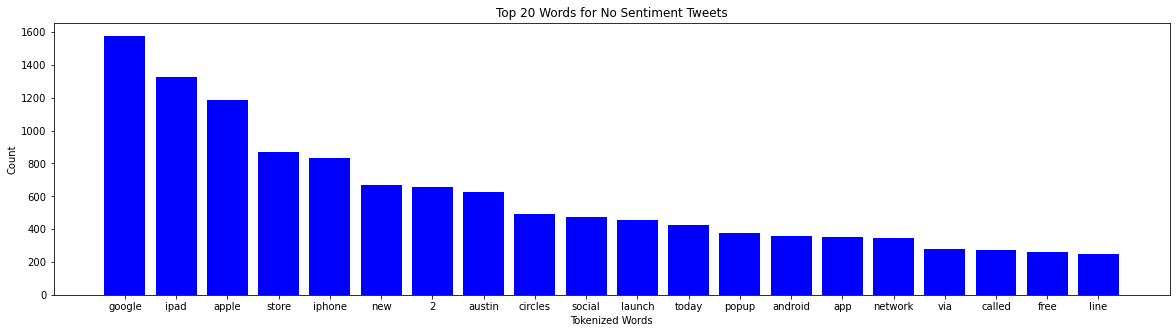

In [30]:
plot_fdist(fdist_pos20, 'Top 20 Words for Positive Sentiment Tweets', 'green')
plot_fdist(fdist_neg20, 'Top 20 Words for Negative Sentiment Tweets', 'red')
plot_fdist(fdist_none20, 'Top 20 Words for No Sentiment Tweets', 'blue')

In [31]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
pos_finder = BigramCollocationFinder.from_words(positive_tweets_tk_list)
score_pos = pos_finder.score_ngrams(bigram_measures.raw_freq)
score_pos[:10]

[(('ipad', '2'), 0.017203564084989718),
 (('apple', 'store'), 0.007402330363262509),
 (('iphone', 'app'), 0.0047292666209732695),
 (('popup', 'store'), 0.004420836189170664),
 (('social', 'network'), 0.0028786840301576423),
 (('google', 'maps'), 0.002775873886223441),
 (('new', 'social'), 0.002638793694311172),
 (('downtown', 'austin'), 0.002467443454420836),
 (('ipad', 'app'), 0.002433173406442769),
 (('apple', 'opening'), 0.002398903358464702)]

In [32]:
neg_finder = BigramCollocationFinder.from_words(neg_tweets_tk_list)
score_neg = neg_finder.score_ngrams(bigram_measures.raw_freq)
score_neg[:10]

[(('ipad', '2'), 0.01072478809894482),
 (('apple', 'store'), 0.0041515308770108976),
 (('iphone', 'app'), 0.0041515308770108976),
 (('ipad', 'design'), 0.0034596090641757483),
 (('design', 'headaches'), 0.002940667704549386),
 (('new', 'social'), 0.0027676872513405985),
 (('google', 'circles'), 0.002594706798131811),
 (('social', 'network'), 0.002594706798131811),
 (('company', 'america'), 0.002248745891714236),
 (('news', 'apps'), 0.002248745891714236)]

In [33]:
none_finder = BigramCollocationFinder.from_words(none_tweets_tk_list)
score_none = none_finder.score_ngrams(bigram_measures.raw_freq)
score_none[:10]

[(('ipad', '2'), 0.010760359074965817),
 (('social', 'network'), 0.006757426233081664),
 (('apple', 'store'), 0.006658343736995423),
 (('new', 'social'), 0.006182747755781464),
 (('called', 'circles'), 0.004914491805877574),
 (('network', 'called'), 0.004855042308225829),
 (('google', 'launch'), 0.004716326813705091),
 (('major', 'new'), 0.004359629827794622),
 (('launch', 'major'), 0.004201097834056635),
 (('popup', 'store'), 0.003943483344232408)]

In [34]:
score_pos10 = list(zip(*score_pos[:10]))
score_neg10 = list(zip(*score_neg[:10]))
score_none10 = list(zip(*score_none[:10]))
score_pos10_x = [str(item) for item in list(score_pos10[0])]
score_pos10_y = list(score_pos10[1])
score_neg10_x = [str(item) for item in list(score_neg10[0])]
score_neg10_y = list(score_neg10[1])
score_none10_x = [str(item) for item in list(score_none10[0])]
score_none10_y = list(score_none10[1])

In [35]:
def plot_bigram(x, y, sentiment='n/a', color='blue'):
    fig, ax = plt.subplots(figsize=(40,10))
    ax.bar(x, y, color=color)
    ax.set_xticklabels(x, fontsize=20)
    ax.set_title(f'Top 10 Two-Word Combos for {sentiment} Sentiment Tweets', fontsize=35)
    plt.show()

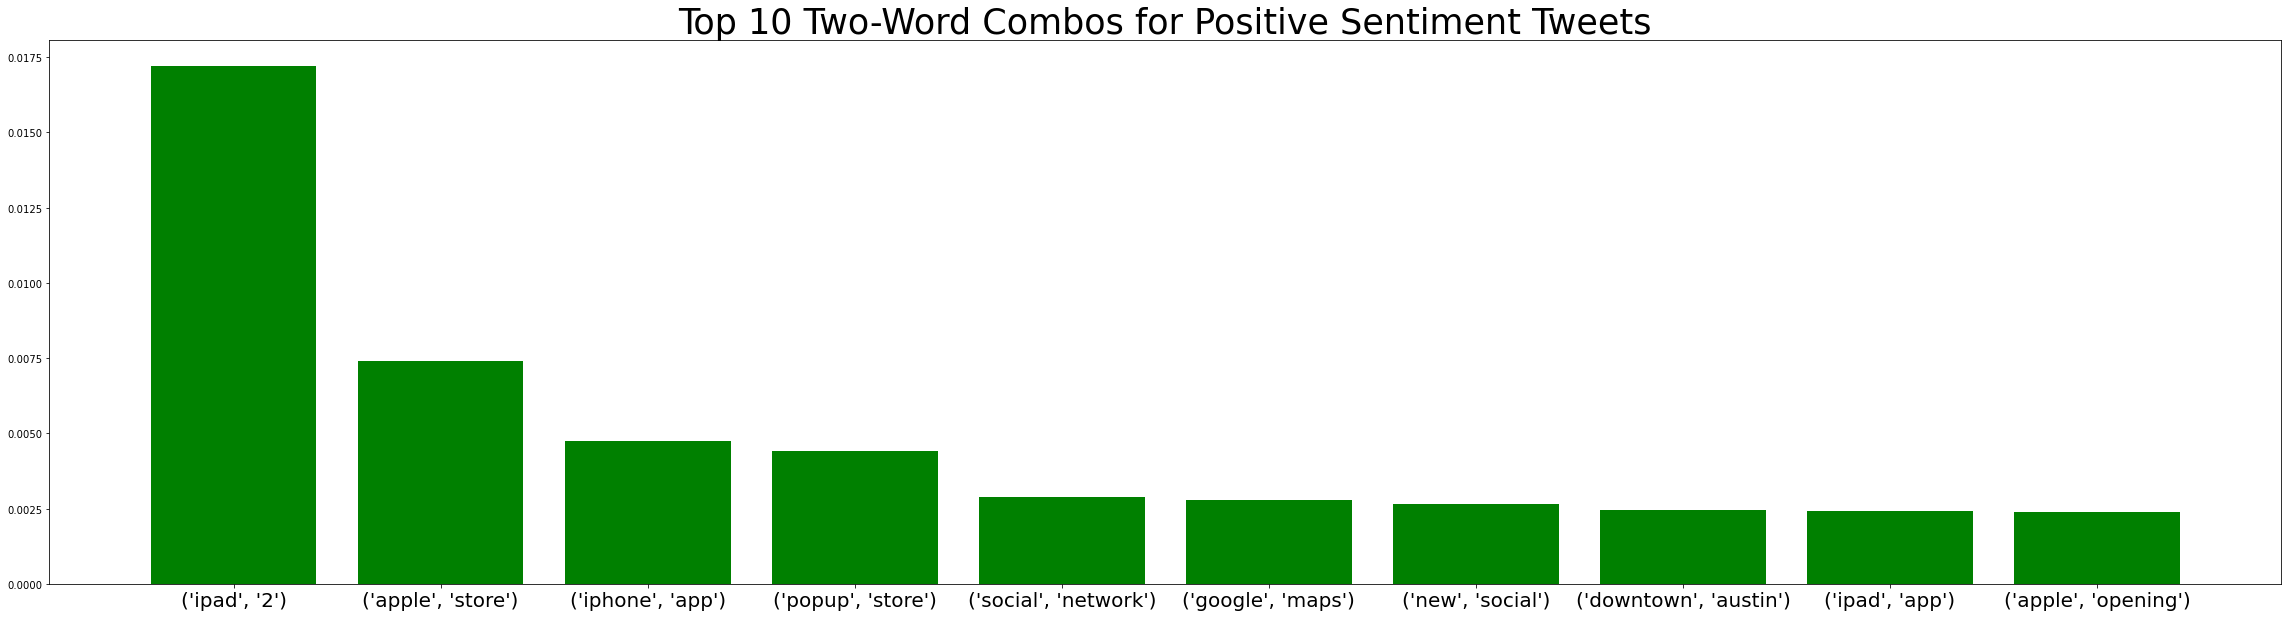

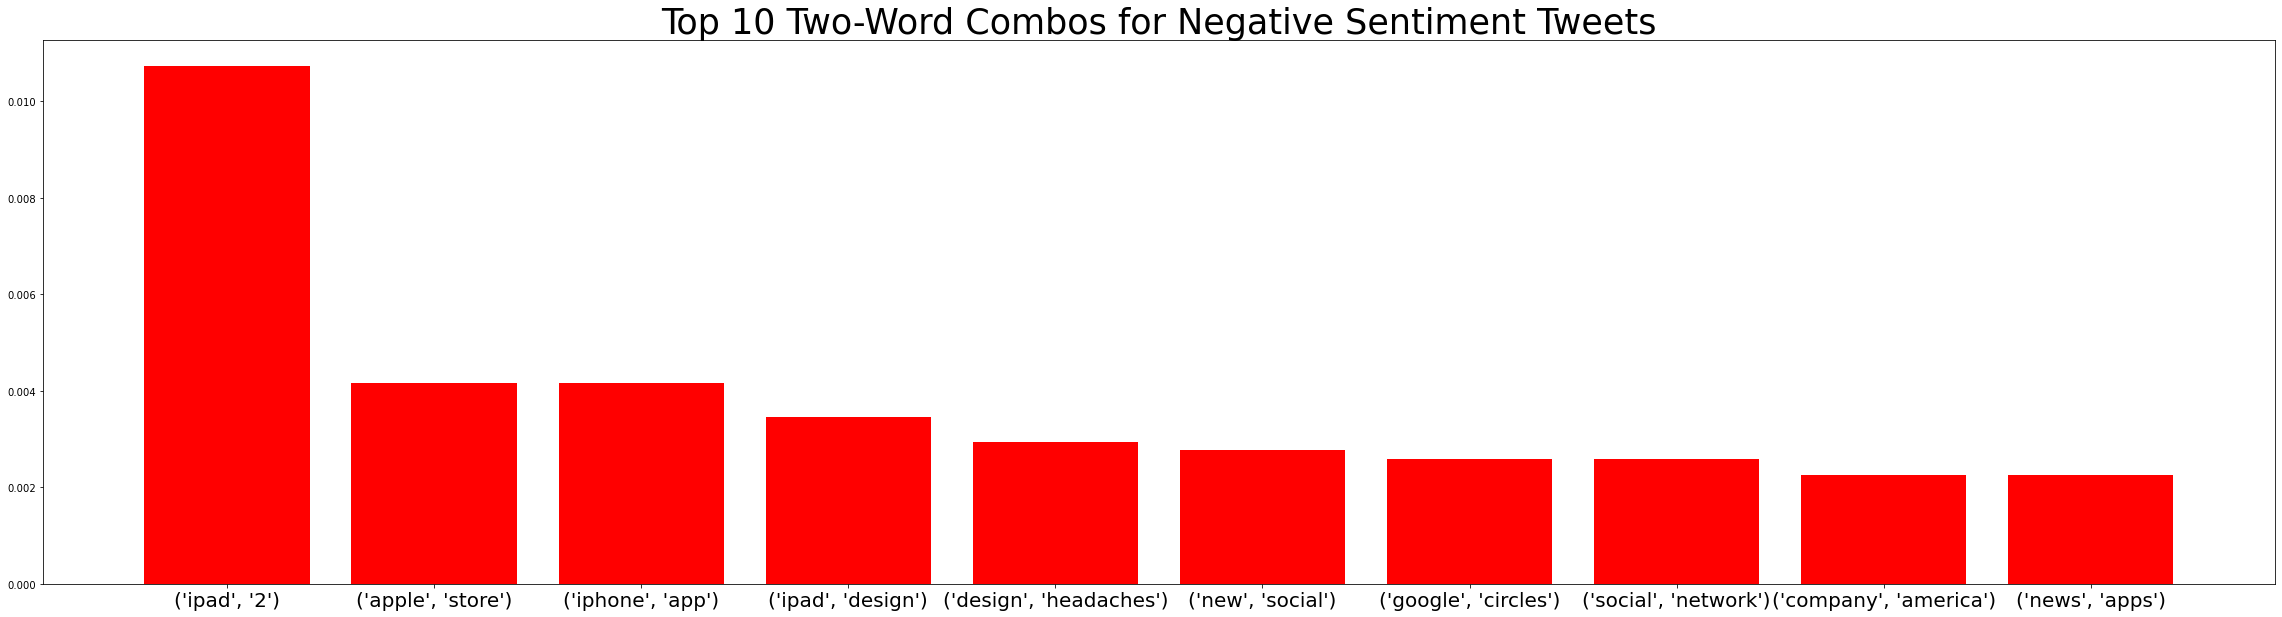

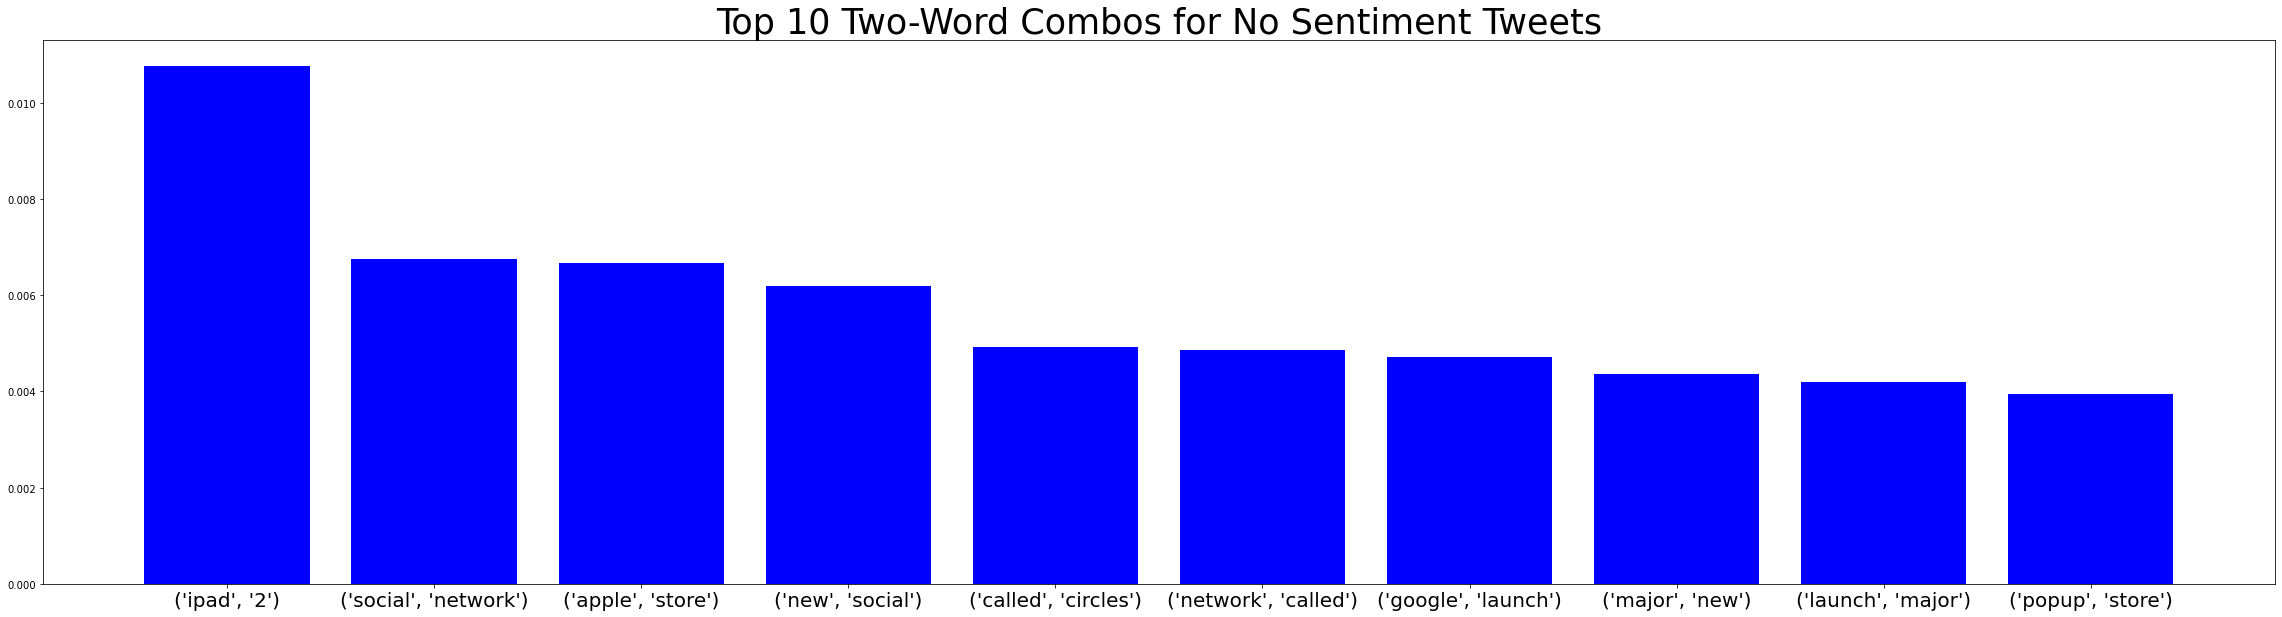

In [36]:
plot_bigram(score_pos10_x, score_pos10_y, sentiment='Positive', color='green')
plot_bigram(score_neg10_x, score_neg10_y, sentiment='Negative', color='red')
plot_bigram(score_none10_x, score_none10_y, sentiment='No', color='blue')

In [37]:
data_tokenized1["tweet_without_stopwords_and_punc"] = data_tokenized1["tweet_without_stopwords_and_punc"].apply(remove_stopwords)
google_tweets = data_tokenized1.loc[(data_tokenized1['product']=='Google') | (data_tokenized1['product']=='Other Google product or service')]
android_tweets = data_tokenized1.loc[(data_tokenized1['product']=='Android') | (data_tokenized1['product']=='Android App')]
apple_tweets = data_tokenized1.loc[(data_tokenized1['product']=='iPad') | (data_tokenized1['product']=='iPhone') | (data_tokenized1['product']=='iPad or iPhone App') | (data_tokenized1['product']=='Other Apple product or service') | (data_tokenized1['product']=='Apple')]

In [38]:
def twt_list(df, sentiment):
    company_twt = df.loc[df['sentiment']==sentiment]
    company_twt = company_twt['tweet_without_stopwords_and_punc']
    company_list = []
    for twt in company_twt:
        company_list+=twt
    return company_list

In [39]:
pos_google_twt_list = twt_list(google_tweets, 'positive')
neg_google_twt_list = twt_list(google_tweets, 'negative')
pos_android_twt_list = twt_list(android_tweets, 'positive')
neg_android_twt_list = twt_list(android_tweets, 'negative')
pos_apl_twt_list = twt_list(apple_tweets, 'positive')
neg_apl_twt_list = twt_list(apple_tweets, 'negative')

In [40]:
from wordcloud import WordCloud
def wordcloud(tokens, background_color='black', text_color='Blues', title=''):
    wordcloud = WordCloud(background_color=background_color, 
                          colormap=text_color, 
                          width=500, height=300)
    wordcloud.generate(','.join(tokens))
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

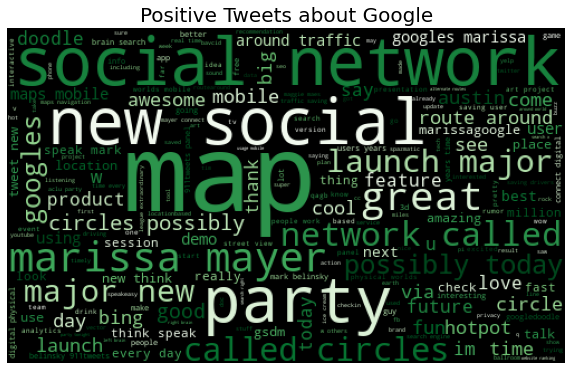

In [41]:
pos_google_wordcloud_list = [item for item in pos_google_twt_list if item!='google']
wordcloud(pos_google_wordcloud_list, text_color='Greens', title="Positive Tweets about Google")

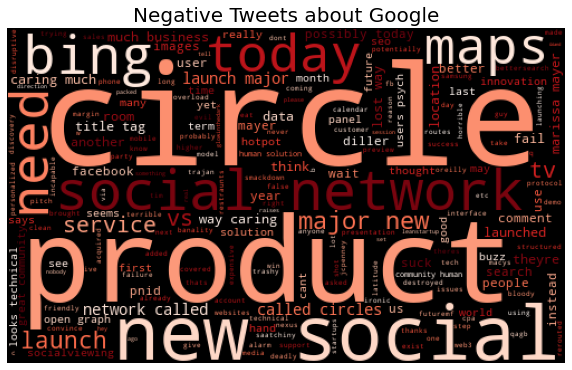

In [42]:
neg_google_wordcloud_list = [item for item in neg_google_twt_list if item!='google']
wordcloud(neg_google_wordcloud_list, text_color='Reds', title='Negative Tweets about Google')

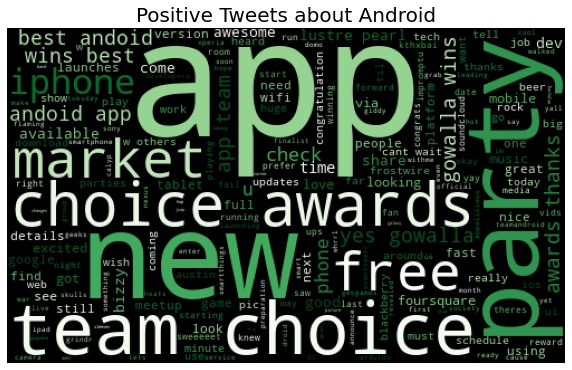

In [43]:
pos_android_wordcloud_list = [item for item in pos_android_twt_list if item!='android']
wordcloud(pos_android_wordcloud_list, text_color='Greens', title='Positive Tweets about Android')

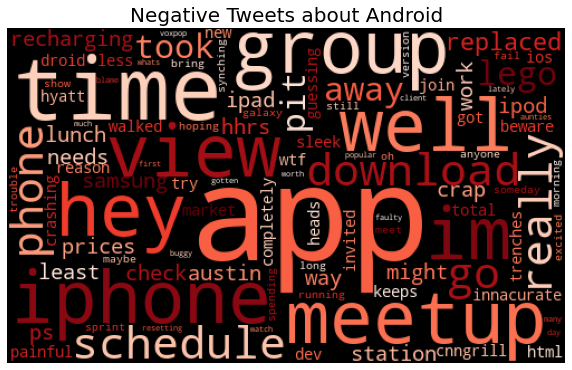

In [44]:
neg_android_wordcloud_list = [item for item in neg_android_twt_list if item!='android']
wordcloud(neg_android_wordcloud_list, text_color='Reds', title='Negative Tweets about Android')

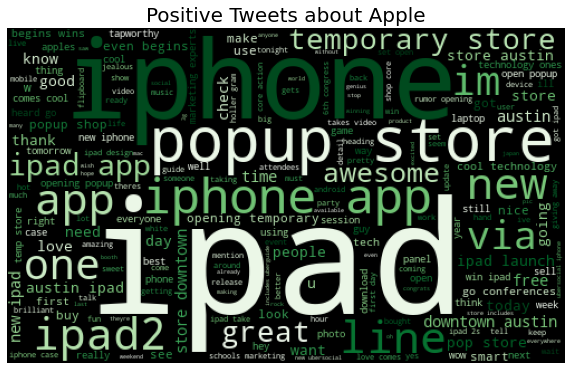

In [45]:
pos_apl_wordcloud_list = [item for item in pos_apl_twt_list if item!='apple']
wordcloud(pos_apl_wordcloud_list, text_color='Greens', title='Positive Tweets about Apple')

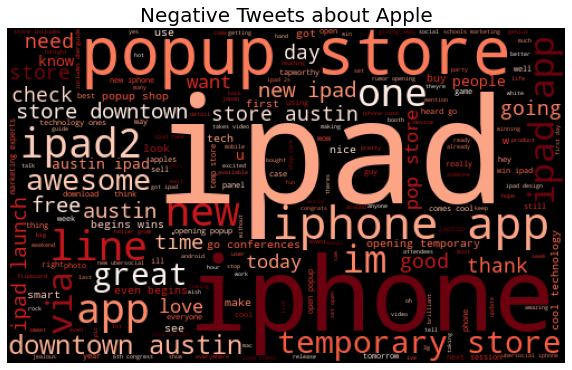

In [46]:
neg_apl_wordcloud_list = [item for item in pos_apl_twt_list if item!='apple']
wordcloud(neg_apl_wordcloud_list, text_color='Reds', title='Negative Tweets about Apple')

In [47]:
def score_bigram(token_list):
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(token_list)
    score = finder.score_ngrams(bigram_measures.raw_freq)
    score_10 = list(zip(*score[:10]))
    return score_10

In [48]:
google_score_pos = score_bigram(pos_google_twt_list)
google_score_neg = score_bigram(neg_google_twt_list)
android_score_pos = score_bigram(pos_android_twt_list)
android_score_neg = score_bigram(neg_android_twt_list)
apl_score_pos = score_bigram(pos_apl_twt_list)
apl_score_neg = score_bigram(neg_apl_twt_list)

In [49]:
def plot_bigram_company(tokens, company = '', sentiment='n/a', color='blue'):
    fig, ax = plt.subplots(figsize=(45,10))
    x = [str(item) for item in list(tokens[0])]
    y = list(tokens[1])
    ax.bar(x, y, color=color)
    ax.set_xticklabels(x, fontsize=20)
    ax.set_title(f'Top 10 Two-Word Combos for {sentiment} Sentiment Tweets about {company}', fontsize=35)
    plt.show()

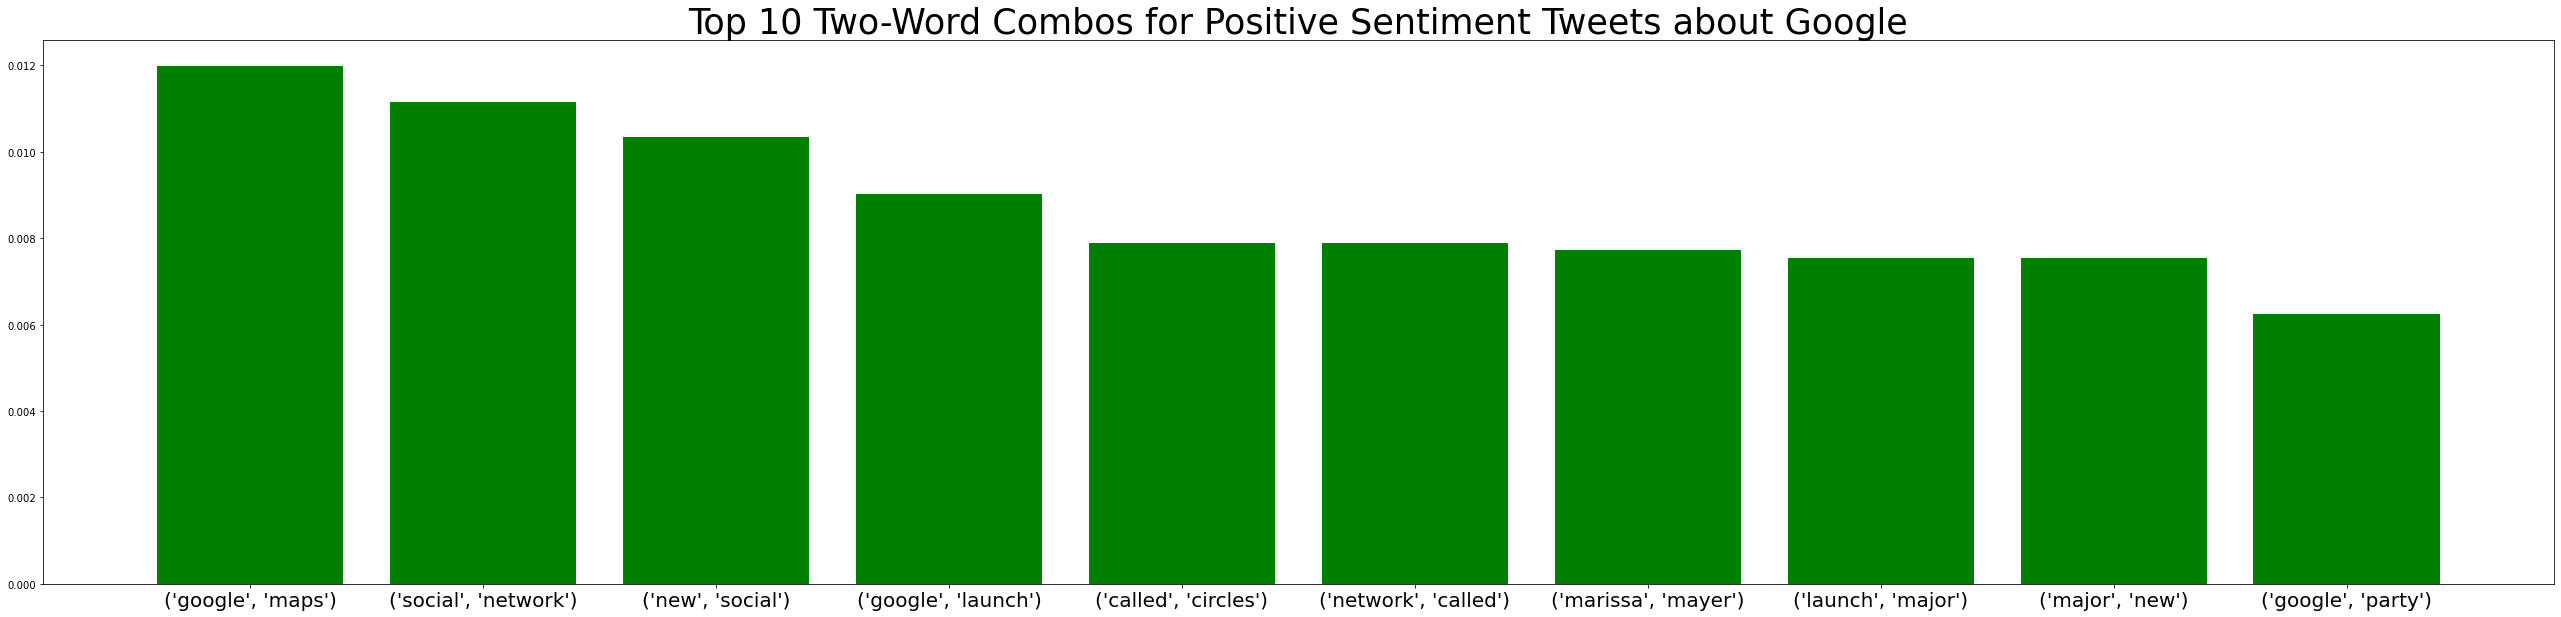

In [50]:
plot_bigram_company(google_score_pos, company='Google', sentiment='Positive', color='green')

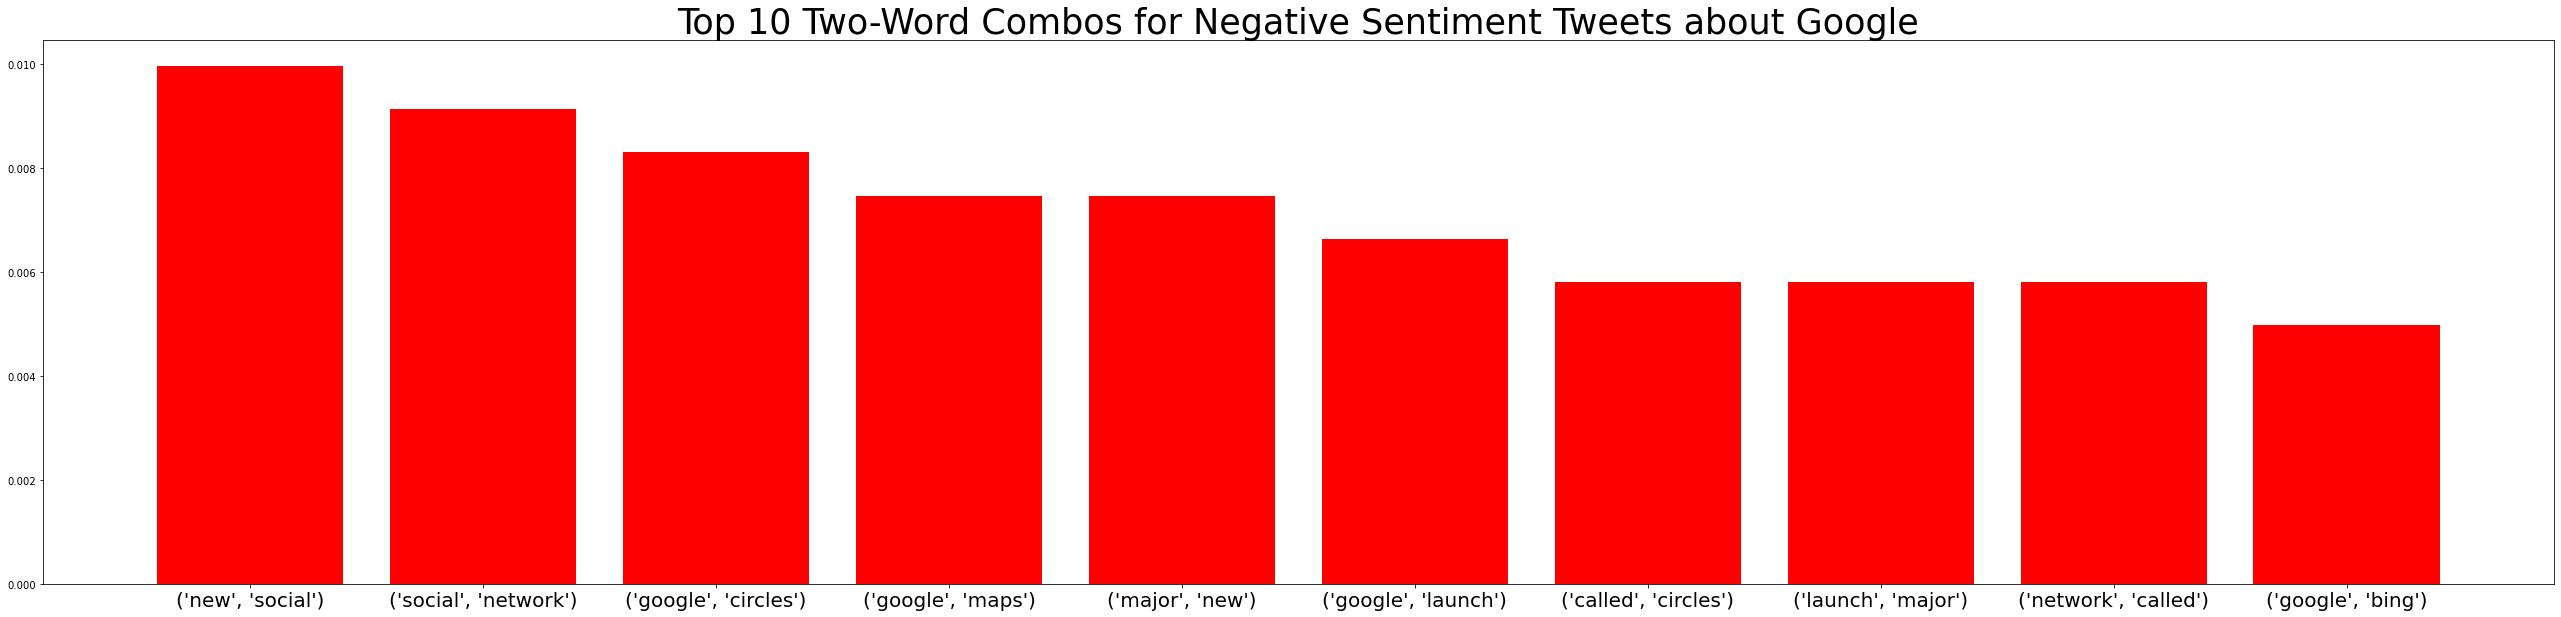

In [51]:
plot_bigram_company(google_score_neg, company='Google', sentiment='Negative', color='red')

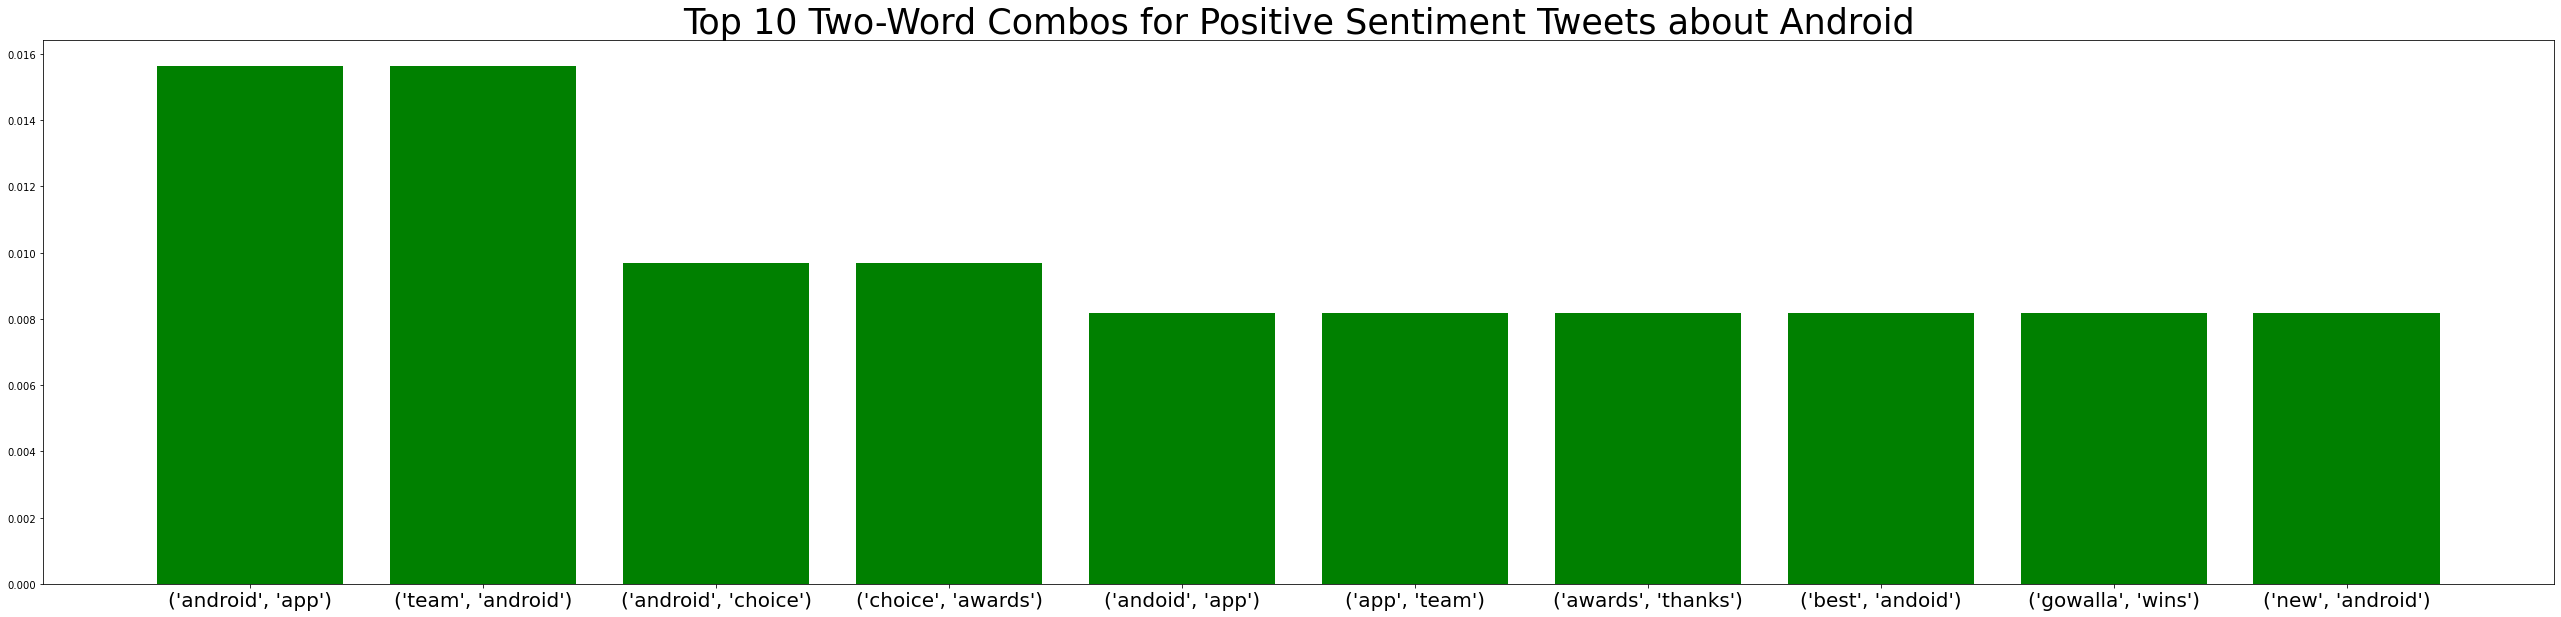

In [52]:
plot_bigram_company(android_score_pos, company='Android', sentiment='Positive', color='green')

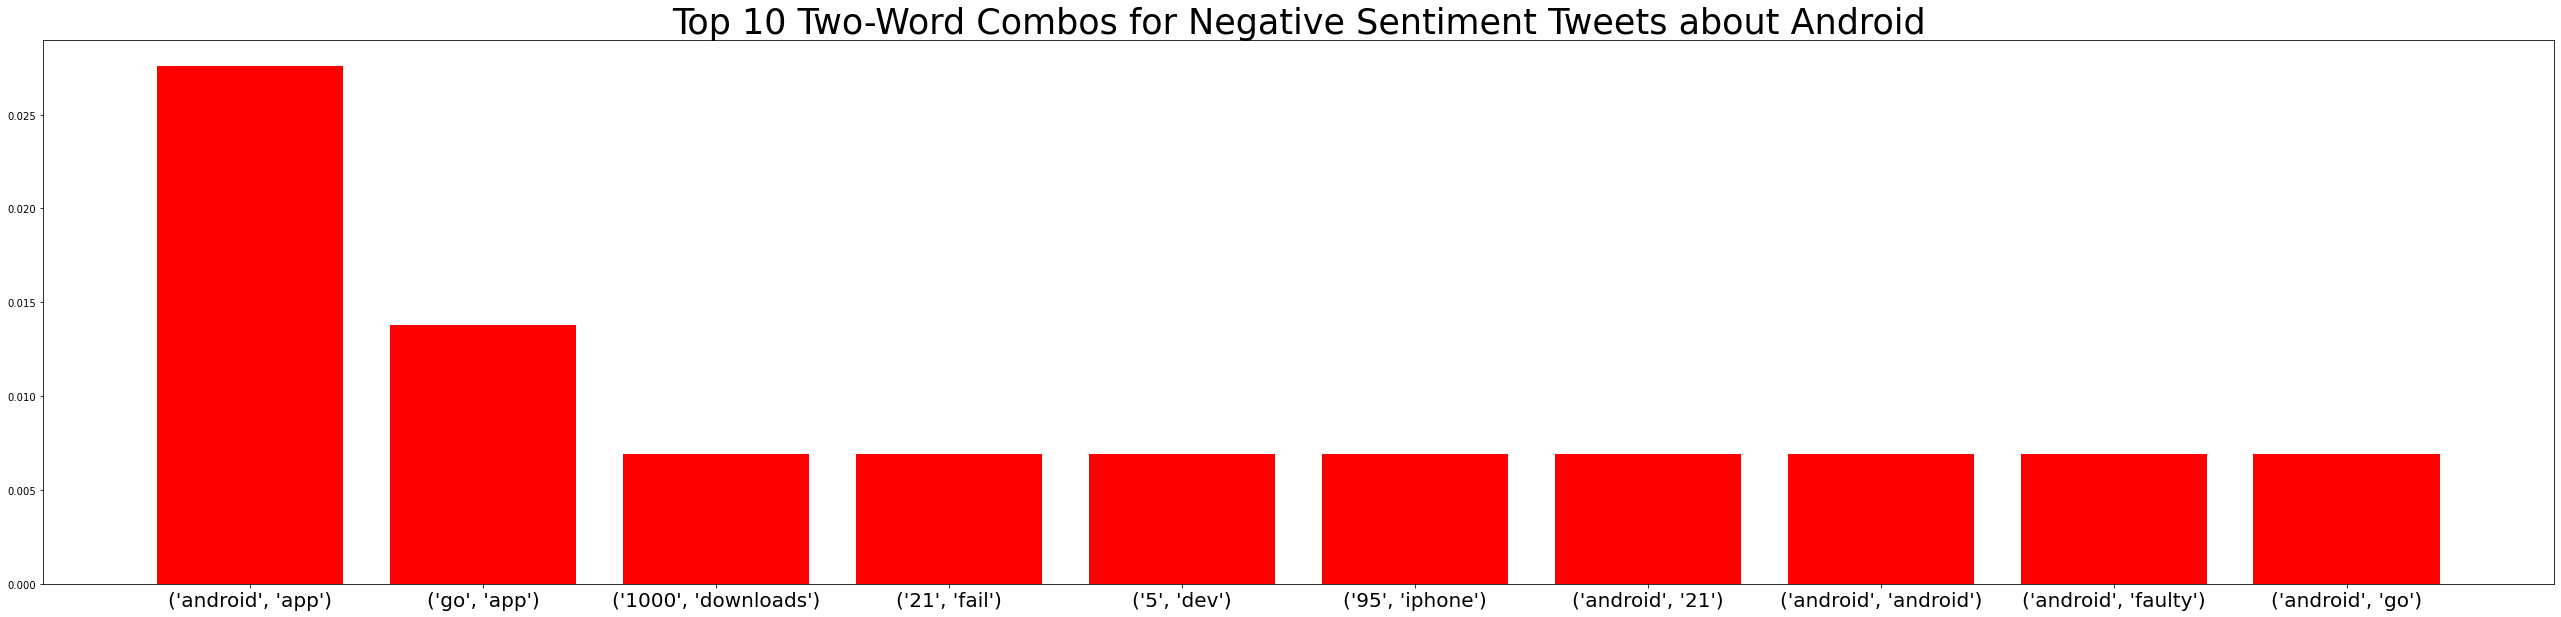

In [53]:
plot_bigram_company(android_score_neg, company='Android', sentiment='Negative', color='red')

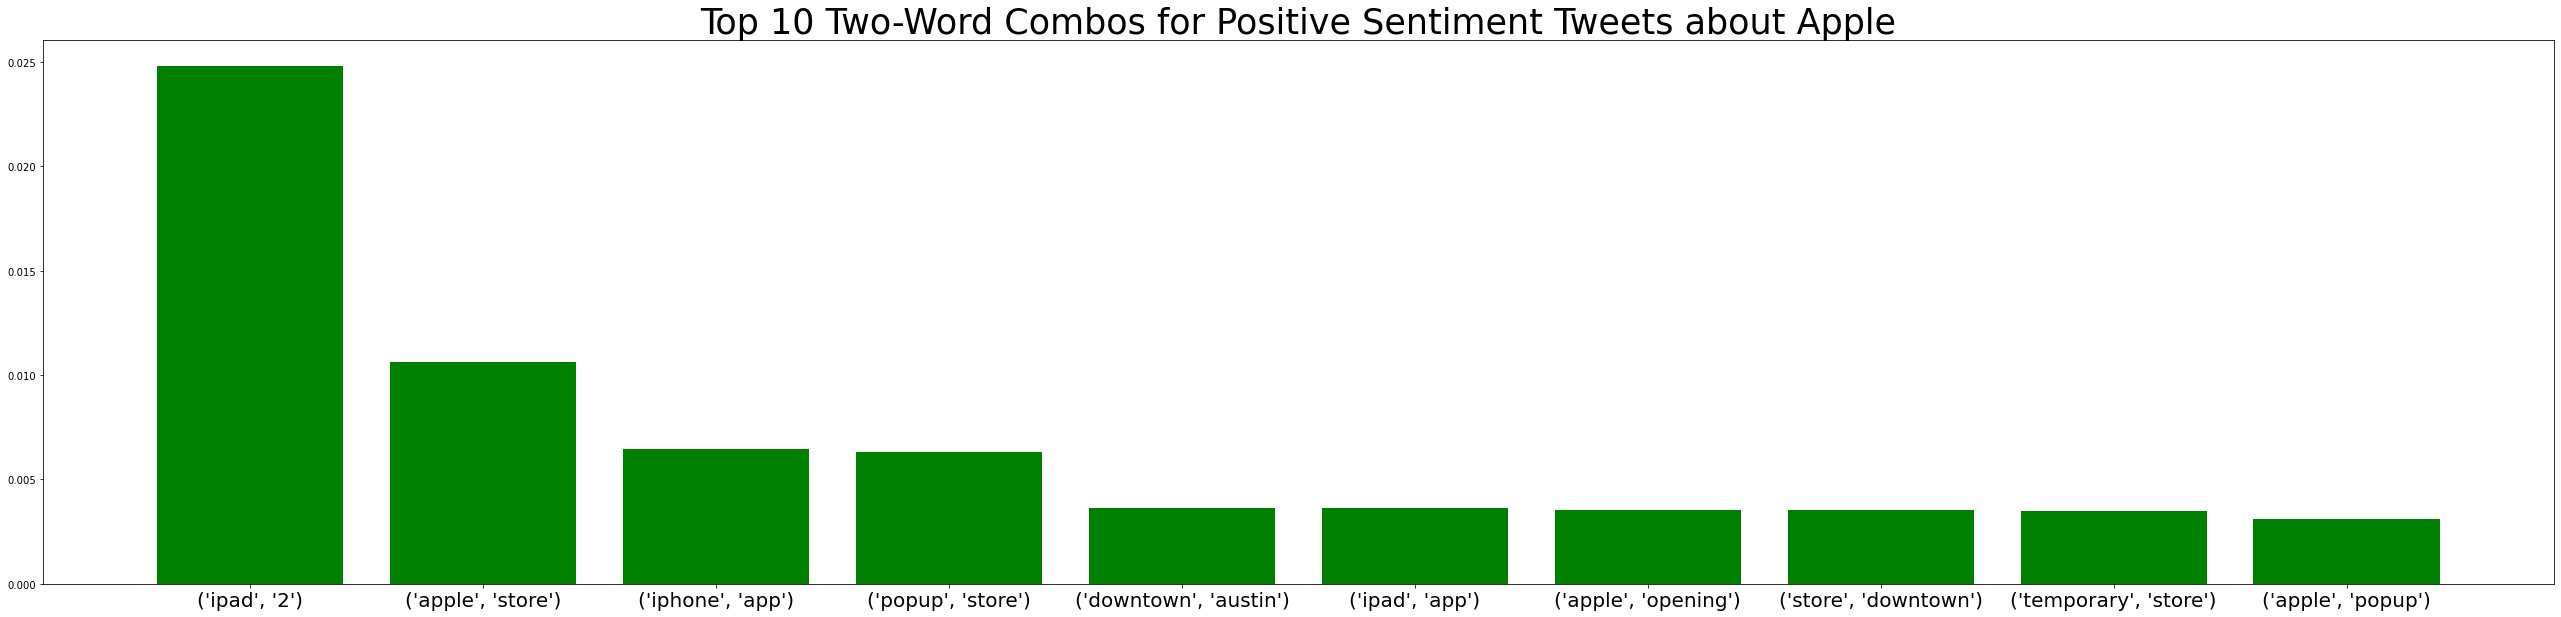

In [54]:
plot_bigram_company(apl_score_pos, company='Apple', sentiment='Positive', color='green')

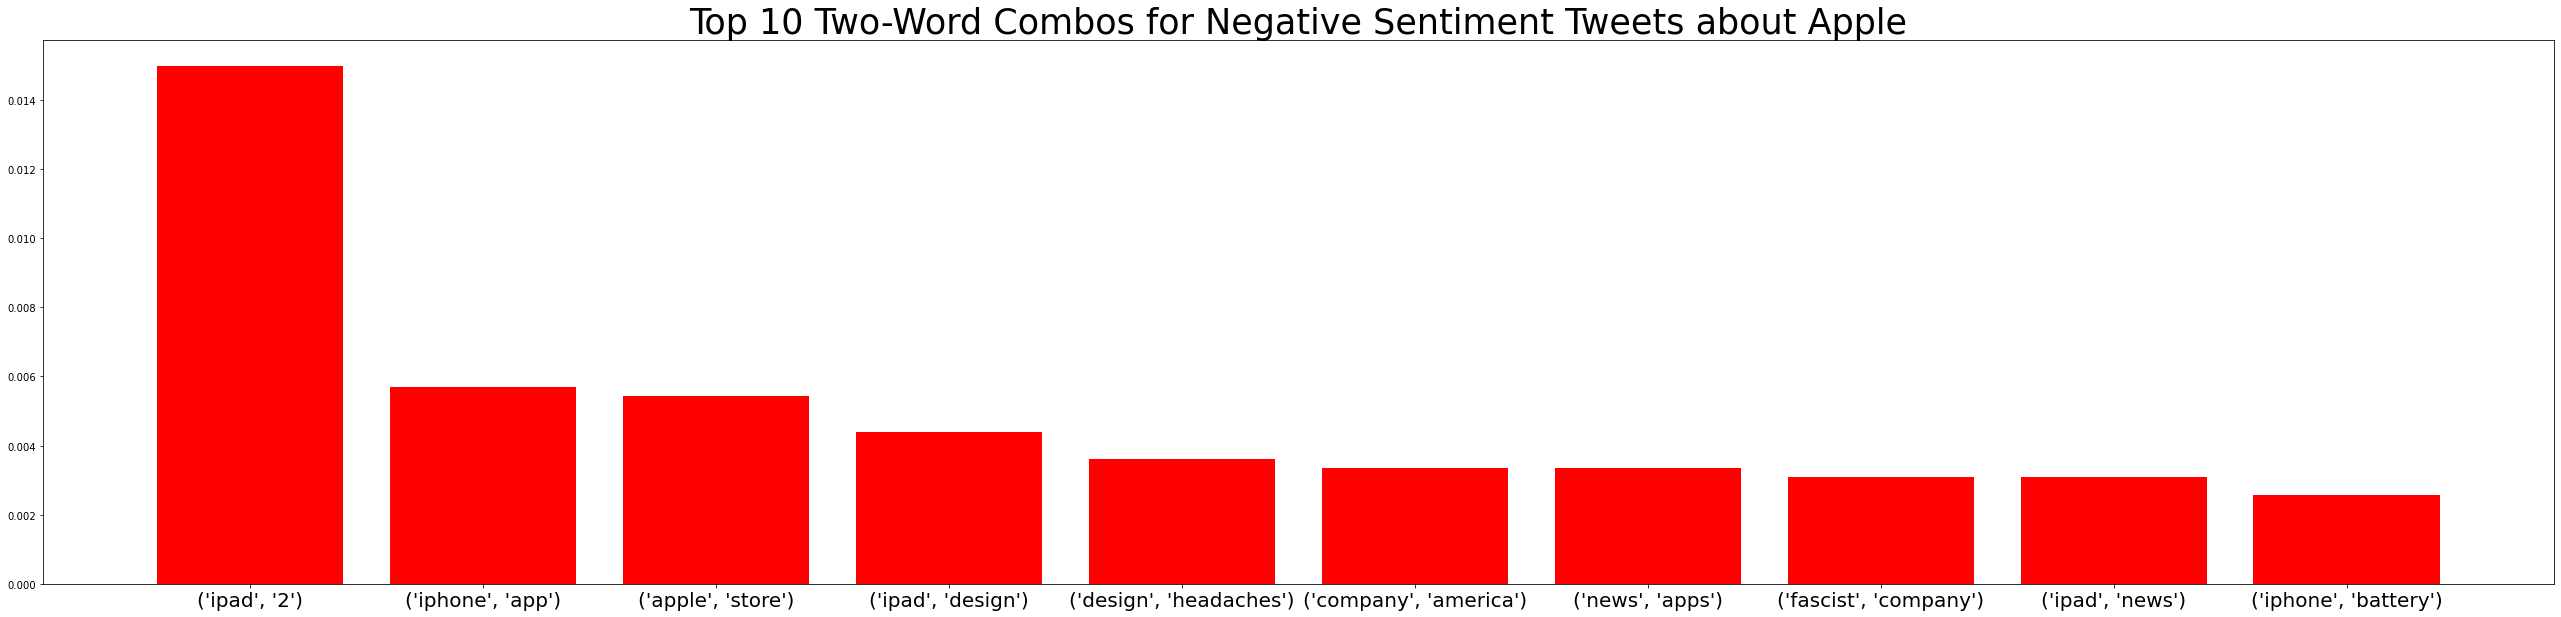

In [55]:
plot_bigram_company(apl_score_neg, company='Apple', sentiment='Negative', color='red')

In [56]:
import numpy as np
def sentiment_piechart(company_twt, title=''):
    y = []
    df = pd.DataFrame(company_twt['sentiment'].value_counts())
    labels = list(df.index)
    for item in company_twt['sentiment'].value_counts().values:
        np.float(item)
        y.append(item)
    plt.figure(figsize=(15,5))
    plt.pie(y, labels=labels, colors=['green', 'red', 'lightblue'], autopct='%1.1f%%')
    plt.title(title, fontsize=15)
    plt.show()

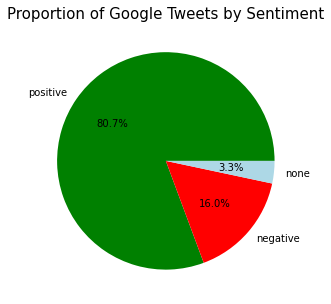

In [57]:
sentiment_piechart(google_tweets, title='Proportion of Google Tweets by Sentiment')

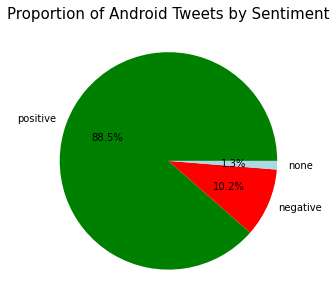

In [58]:
sentiment_piechart(android_tweets, title='Proportion of Android Tweets by Sentiment')

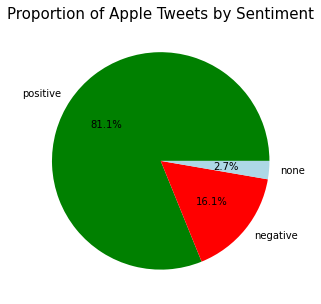

In [59]:
sentiment_piechart(apple_tweets, title='Proportion of Apple Tweets by Sentiment')

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline

In [61]:
model_df = data.loc[data['sentiment']!='none']
sentiment_dict = {'positive': 1, 'negative': 0}
model_df['sentiment']=model_df['sentiment'].map(sentiment_dict)
X = model_df['tweet']
y = model_df['sentiment']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
clf_pipe = Pipeline([('vect', TfidfVectorizer()), ('mnb_baseline', MultinomialNB())])
clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.05       159
           1       0.85      1.00      0.92       903

    accuracy                           0.85      1062
   macro avg       0.93      0.51      0.49      1062
weighted avg       0.88      0.85      0.79      1062



In [64]:
y_train.value_counts(normalize=True)

1    0.834477
0    0.165523
Name: sentiment, dtype: float64

In [65]:
clf_pipe = Pipeline([('vect', TfidfVectorizer(tokenizer = tk.tokenize, stop_words=stopwords_list)),
                     ('mnb_baseline', MultinomialNB())])
clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.06      0.12       159
           1       0.86      1.00      0.92       903

    accuracy                           0.86      1062
   macro avg       0.93      0.53      0.52      1062
weighted avg       0.88      0.86      0.80      1062



In [66]:
param_grid = {'vect__ngram_range': [(1,1), (1,2), (1,3)],
              'mnb_baseline__alpha': [0.00001, 0.0001, 0.001, 0.1, 1]}
gs = GridSearchCV(estimator = clf_pipe, param_grid = param_grid, scoring = 'recall_macro')
gs.fit(X_train, y_train)
gs.best_params_

{'mnb_baseline__alpha': 0.001, 'vect__ngram_range': (1, 3)}

In [67]:
clf_pipe_tuned_mnb = Pipeline([('vect', TfidfVectorizer(tokenizer = tk.tokenize, 
                                                        stop_words = stopwords_list,
                                                        ngram_range = (1,3))),
                     ('mnb_baseline', MultinomialNB(alpha = 0.001))])
clf_pipe_tuned_mnb.fit(X_train, y_train)
y_pred = clf_pipe_tuned_mnb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50       159
           1       0.90      0.97      0.93       903

    accuracy                           0.88      1062
   macro avg       0.79      0.68      0.72      1062
weighted avg       0.87      0.88      0.87      1062



In [69]:
from imblearn.over_sampling import RandomOverSampler
clf_pipe_tuned_mnb_os = Pipeline([('vect', TfidfVectorizer(tokenizer = tk.tokenize, 
                                                        stop_words = stopwords_list,
                                                        ngram_range = (1,3))),
                                  ('os', RandomOverSampler(random_state = 42)),
                                  ('mnb_baseline', MultinomialNB(alpha = 0.001))])
clf_pipe_tuned_mnb_os.fit(X_train, y_train)
y_pred = clf_pipe_tuned_mnb_os.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.44      0.53       159
           1       0.91      0.96      0.93       903

    accuracy                           0.88      1062
   macro avg       0.78      0.70      0.73      1062
weighted avg       0.87      0.88      0.87      1062

